### Keras CNN 解决 CIFAR10 问题

#### 1. 使用 conda 安装 Keras

` conda install keras `

#### 2. 导入 MNIST 数据集

In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#### 3. 处理数据集

* 有 50000 个训练集，10000 个测试集

* 除以 255 是为了将 0-255 的 RGB 值映射到 0-1 之间

In [3]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32') / 255

In [4]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

#### 4. 建立模型

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

In [6]:
model = Sequential([
    Conv2D(input_shape=(32, 32, 3),
           filters=12,
           kernel_size=3,
           padding='same',
           activation='relu'),
    Dropout(0.25),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=24,
           kernel_size=3,
           padding='same',
           activation='relu'),
    Dropout(0.25),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=32,
           kernel_size=3,
           padding='same',
           activation='relu'),
    Dropout(0.25),
    Flatten(),
    Dense(units=1000,
          kernel_initializer='normal',
          activation='relu'),
    Dropout(0.5),
    Dense(units=100,
          kernel_initializer='normal',
          activation='relu'),
    Dense(units=10,
          kernel_initializer='normal',
          activation='softmax')
])

#### 5. 输出模型结构

In [7]:
from keras.utils import plot_model
plot_model(model,
           to_file='Keras_CNN_CIFAR10_model.png',
           show_shapes=True,
           show_layer_names=False)

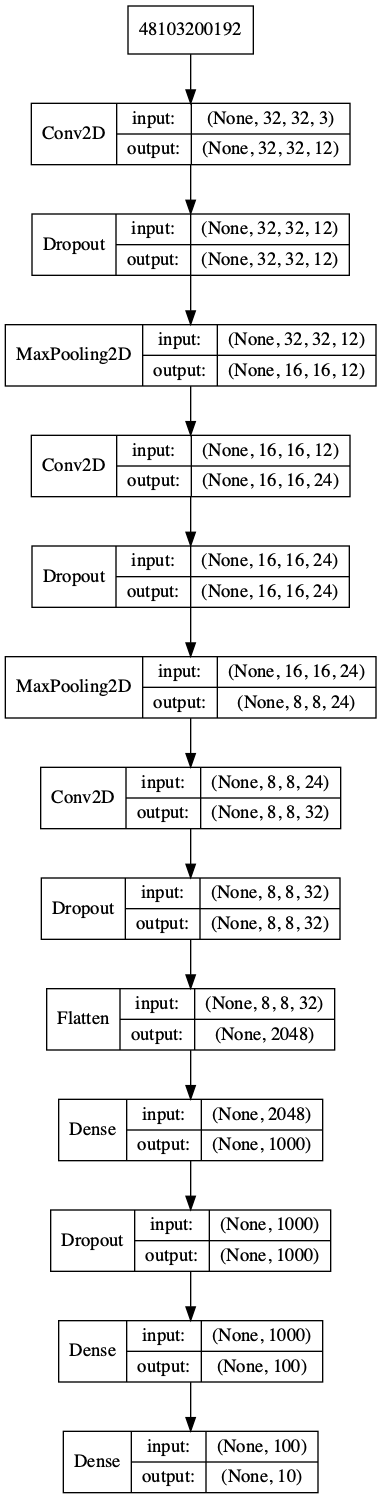

In [8]:
from IPython.display import Image
Image('Keras_CNN_CIFAR10_model.png')

#### 6. 定义训练方式

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#### 7. 开始训练

In [ ]:
history = model.fit(x=x_train,
                   y=y_train,
                   validation_split=0.2,
                   epochs=10,
                   batch_size=64,
                   verbose=2)